# RL Tennis playing

In [1]:
from unityagents import UnityEnvironment
import numpy as np
from brain.agent import Agent, Config
from brain.teacher import Teacher

C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


Next, we will start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Tennis.app"`
- **Windows** (x86): `"path/to/Tennis_Windows_x86/Tennis.exe"`
- **Windows** (x86_64): `"path/to/Tennis_Windows_x86_64/Tennis.exe"`
- **Linux** (x86): `"path/to/Tennis_Linux/Tennis.x86"`
- **Linux** (x86_64): `"path/to/Tennis_Linux/Tennis.x86_64"`
- **Linux** (x86, headless): `"path/to/Tennis_Linux_NoVis/Tennis.x86"`
- **Linux** (x86_64, headless): `"path/to/Tennis_Linux_NoVis/Tennis.x86_64"`

For instance, if you are using a Mac, then you downloaded `Tennis.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = UnityEnvironment(file_name="Tennis.app")
```

In [2]:
env = UnityEnvironment(file_name="Tennis_Windows_x86_64/Tennis.exe")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: TennisBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 8
        Number of stacked Vector Observation: 3
        Vector Action space type: continuous
        Vector Action space size (per agent): 2
        Vector Action descriptions: , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

In [4]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

Number of agents: 2
Size of each action: 2
There are 2 agents. Each observes a state with length: 24
The state for the first agent looks like: [ 0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.         -6.65278625 -1.5
 -0.          0.          6.83172083  6.         -0.          0.        ]


### Train agent

In [5]:
config = Config()
config.BUFFER_SIZE=int(3e4)

agent = Agent(state_size, action_size, config)
teacher = Teacher(agent, env, brain_name, num_agents)
# teacher.set_epsilon(1.0, 0.01, 80)

In [6]:
res = teacher.train(1000, 100, 0.5)

  2%|▊                                   | 24/1000 [00:02<01:48,  8.99it/s, actor_loss=0, critic_loss=0, scores=0.0321]

Learning started


 76%|██████████▌   | 756/1000 [02:56<00:57,  4.28it/s, actor_loss=-0.063044585, critic_loss=0.044002566, scores=0.0484]

Memory filled


 89%|██████████████▎ | 891/1000 [06:55<00:50,  2.15it/s, actor_loss=-0.07792923, critic_loss=0.052385934, scores=0.511]

Environment solved in 791 episodes!


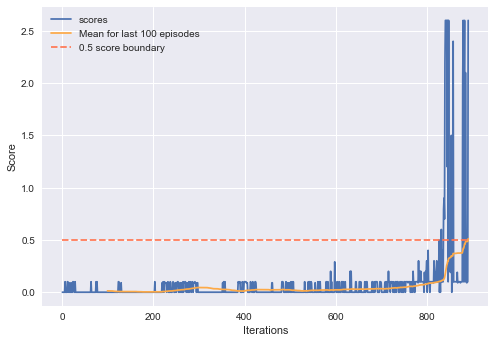

In [7]:
Teacher.visualise_scores(res, 100, 0.5)

When finished, you can close the environment.

In [8]:
teacher.display()

2.600000038743019

In [9]:
import torch
torch.save(agent.actor_local.state_dict(), 'pytorch_models/checkpoint_actor.pth')
torch.save(agent.critic_local.state_dict(), 'pytorch_models/checkpoint_critic.pth')